# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

##Imports

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict

##Lendo CSV

In [2]:
df = pd.read_csv('marketing_campaign.csv', delimiter=';')
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1


##Exploração

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchases       2240 non-null   int64  
dtypes: float64(1), int64(13)

In [4]:
df.describe()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,5.790179,5.316518,0.009375,0.503571
std,11.984069,25173.076661,0.538398,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,3.250958,2.426645,0.096391,0.500099
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,5.000000,6.000000,0.000000,1.000000
75%,1977.000000,68522.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,8.000000,7.000000,0.000000,1.000000
max,1996.000000,666666.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,13.000000,20.000000,1.000000,1.000000


In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2216 non-null   int64  
 1   Education          2216 non-null   object 
 2   Marital_Status     2216 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2216 non-null   int64  
 5   Recency            2216 non-null   int64  
 6   MntWines           2216 non-null   int64  
 7   MntFruits          2216 non-null   int64  
 8   MntMeatProducts    2216 non-null   int64  
 9   MntFishProducts    2216 non-null   int64  
 10  MntSweetProducts   2216 non-null   int64  
 11  MntGoldProds       2216 non-null   int64  
 12  NumStorePurchases  2216 non-null   int64  
 13  NumWebVisitsMonth  2216 non-null   int64  
 14  Complain           2216 non-null   int64  
 15  WebPurchases       2216 non-null   int64  
dtypes: float64(1), int64(13), obj

In [6]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [7]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [8]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


Olhando so dados não numéricos (Education e Marital_Status) nota-se que o estado civil apresenta valores estranhos e que redundantes. Dessa forma, os dados com valores 'Absurd' e 'YOLO' foram removidos por serem apenas 4. Os outros foram organizados de maneira a diminuir a complexidade dessa variável e ajudar no modelo. Então foram divididos em apenas 2 valores: Single e Married. Os cadastros que apresentavam valores de 'Divorced', 'Widow' e 'Alone' foram transformados em Single, e os cadastros com valores de 'Together' Foram transformados em 'Married' conforme código abaixo:

In [10]:
drop = df[(df['Marital_Status'] == 'Absurd') | (df['Marital_Status'] == 'YOLO')].index
df.drop(index=drop, inplace=True)

In [11]:
df['Marital_Status'] = df['Marital_Status'].replace(
    to_replace=['Single', 'Divorced', 'Widow', 'Alone'],
    value='Single'
)

df['Marital_Status'] = df['Marital_Status'].replace(
    to_replace=['Married', 'Together'],
    value='Married'
)

df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,1430
Single,782


Agora análisando possíveis outliers foram feitos os seguintes boxplots:

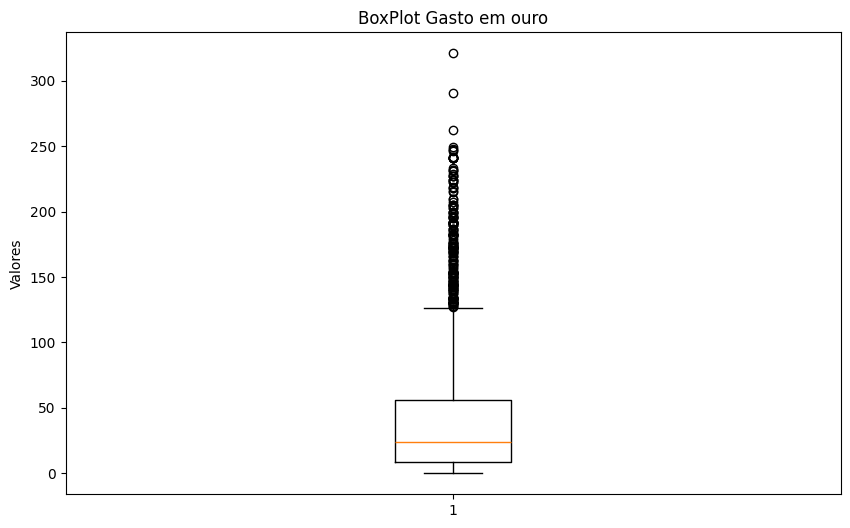

In [12]:
plt.figure(figsize=(10,6))

plt.boxplot(df['MntGoldProds'])
plt.title('BoxPlot Gasto em ouro')
plt.xlabel('')
plt.ylabel('Valores')
plt.show()

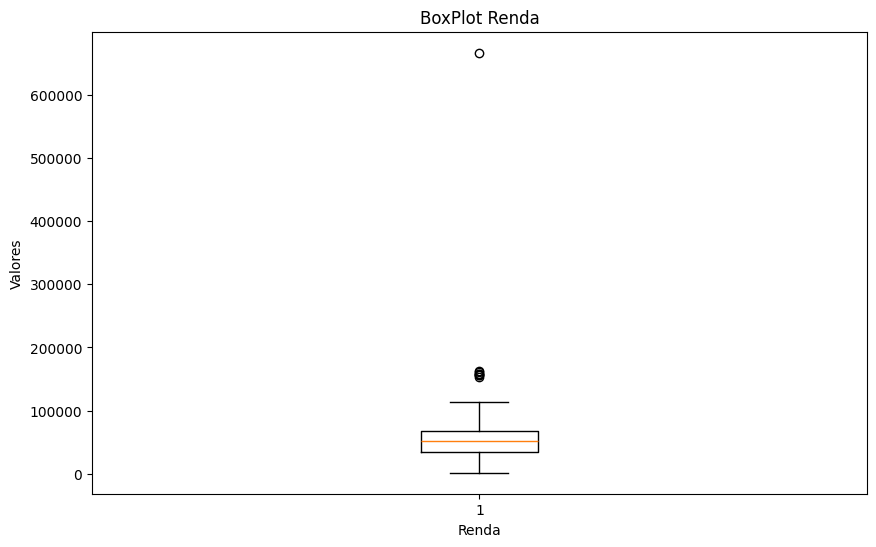

In [13]:
plt.figure(figsize=(10,6))

plt.boxplot(df['Income'])
plt.title('BoxPlot Renda')
plt.xlabel('Renda')
plt.ylabel('Valores')
plt.show()

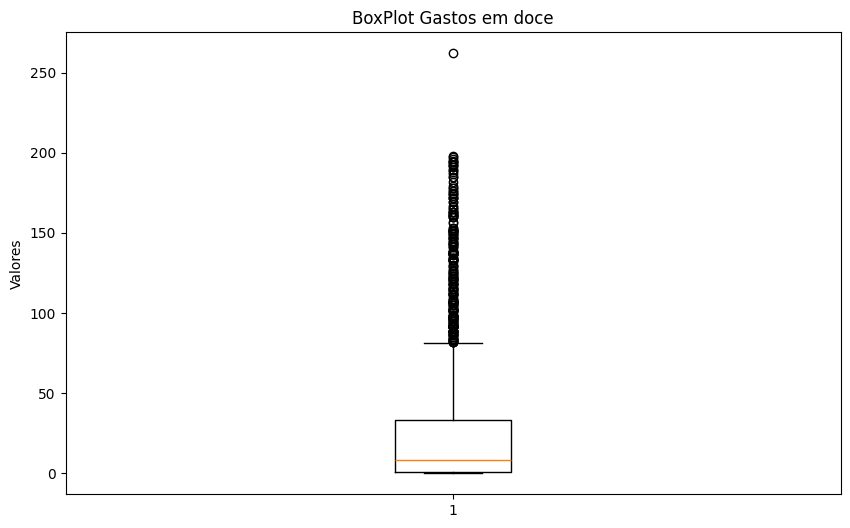

In [14]:
plt.figure(figsize=(10,6))

plt.boxplot(df['MntSweetProducts'])
plt.title('BoxPlot Gastos em doce')
plt.xlabel('')
plt.ylabel('Valores')
plt.show()

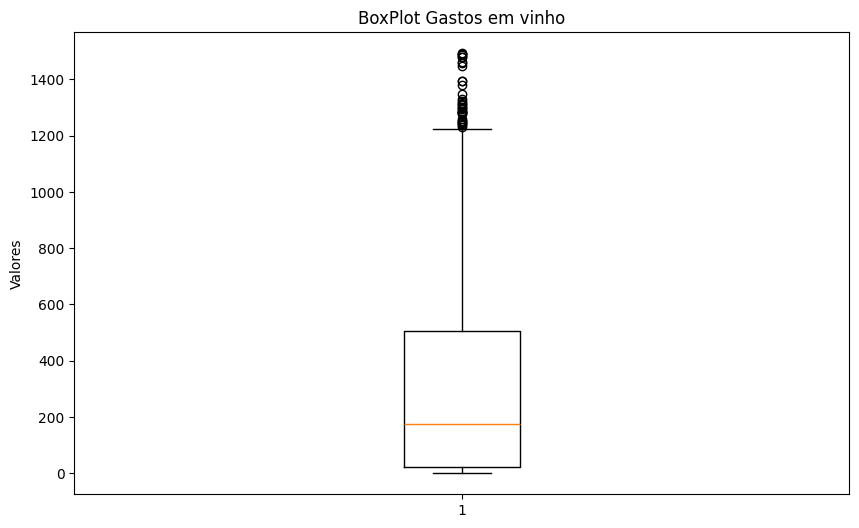

In [15]:
plt.figure(figsize=(10,6))

plt.boxplot(df['MntWines'])
plt.title('BoxPlot Gastos em vinho')
plt.xlabel('')
plt.ylabel('Valores')
plt.show()

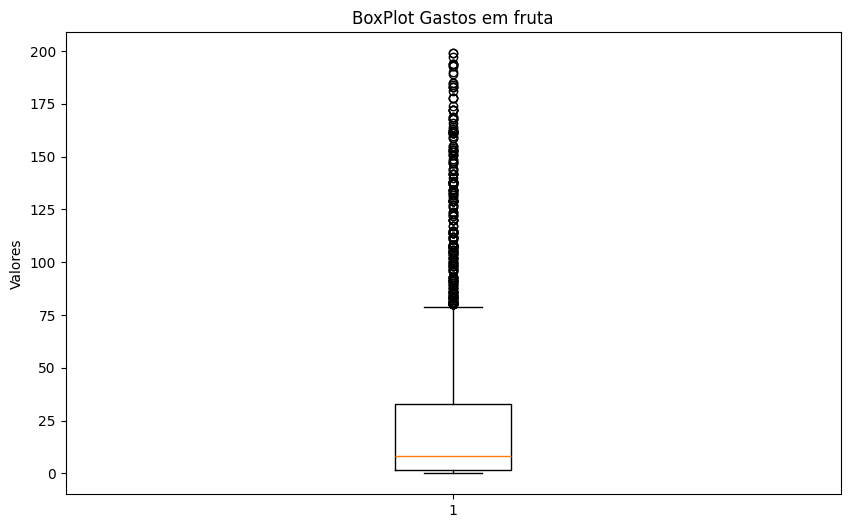

In [16]:
plt.figure(figsize=(10,6))

plt.boxplot(df['MntFruits'])
plt.title('BoxPlot Gastos em fruta')
plt.xlabel('')
plt.ylabel('Valores')
plt.show()

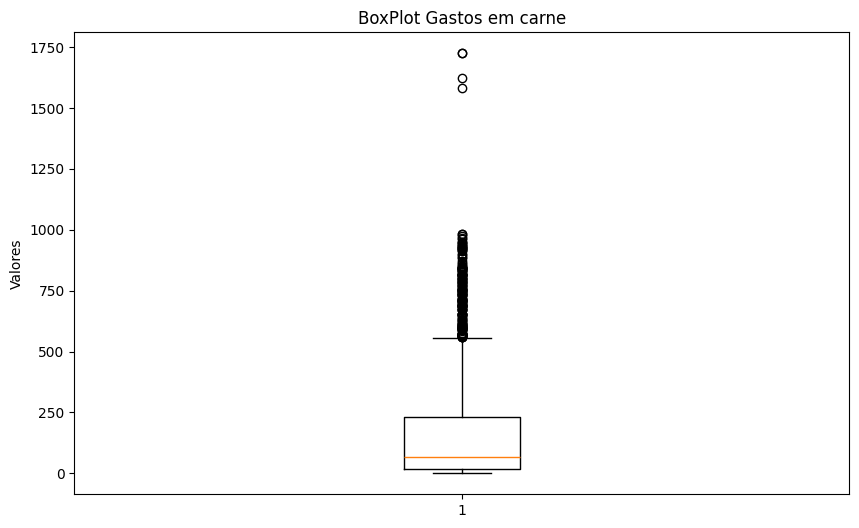

In [17]:
plt.figure(figsize=(10,6))

plt.boxplot(df['MntMeatProducts'])
plt.title('BoxPlot Gastos em carne')
plt.xlabel('')
plt.ylabel('Valores')
plt.show()

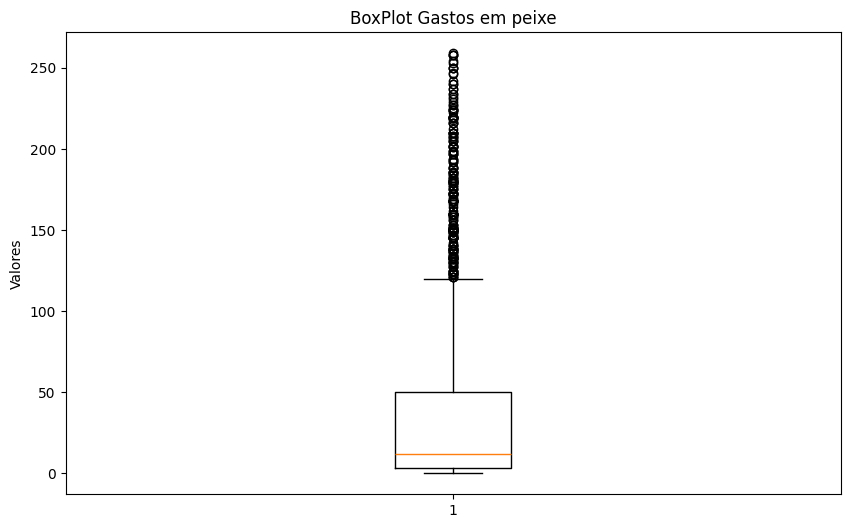

In [18]:
plt.figure(figsize=(10,6))

plt.boxplot(df['MntFishProducts'])
plt.title('BoxPlot Gastos em peixe')
plt.xlabel('')
plt.ylabel('Valores')
plt.show()

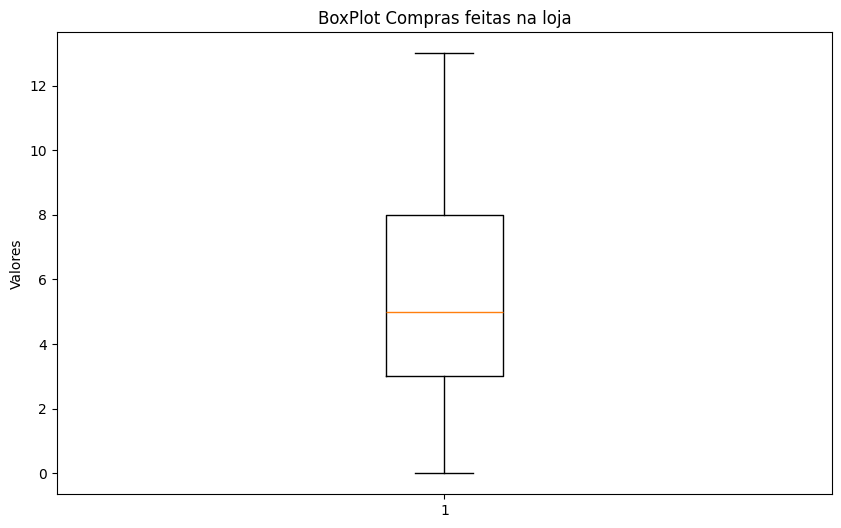

In [19]:
plt.figure(figsize=(10,6))

plt.boxplot(df['NumStorePurchases'])
plt.title('BoxPlot Compras feitas na loja')
plt.xlabel('')
plt.ylabel('Valores')
plt.show()

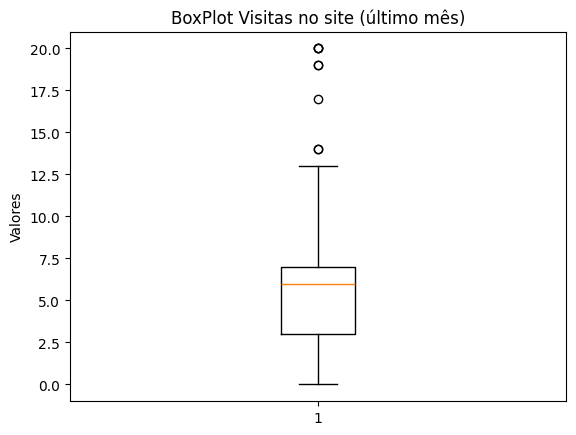

In [20]:
plt.boxplot(df['NumWebVisitsMonth'])
plt.title('BoxPlot Visitas no site (último mês)')
plt.xlabel('')
plt.ylabel('Valores')
plt.show()

Afim de eliminar os outliers que apareceram nos gráficos, foi usada a regras dos quartis, eliminando os quartis superiores e inferiores.

In [22]:
df_numerico = df.select_dtypes(include=['number'])

Q1 = df_numerico.quantile(0.25)
Q3 = df_numerico.quantile(0.85)
IQR = Q3 - Q1

# Limites inferiores e superiores
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_refac = df.copy()
for col in df_numerico.columns:
    df_refac = df_refac[df_refac[col] <= limite_superior[col]]

df_refac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2018 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2018 non-null   int64  
 1   Education          2018 non-null   object 
 2   Marital_Status     2018 non-null   object 
 3   Income             2018 non-null   float64
 4   Kidhome            2018 non-null   int64  
 5   Recency            2018 non-null   int64  
 6   MntWines           2018 non-null   int64  
 7   MntFruits          2018 non-null   int64  
 8   MntMeatProducts    2018 non-null   int64  
 9   MntFishProducts    2018 non-null   int64  
 10  MntSweetProducts   2018 non-null   int64  
 11  MntGoldProds       2018 non-null   int64  
 12  NumStorePurchases  2018 non-null   int64  
 13  NumWebVisitsMonth  2018 non-null   int64  
 14  Complain           2018 non-null   int64  
 15  WebPurchases       2018 non-null   int64  
dtypes: float64(1), int64(13), obj

Ao realizar o calculo do limite superior, usando o quartil inferior (Q1) e o quartil superior (Q3), sem alterar nada, seriam eliminados mais de 600 cadastros do data frame (mais de 20% dos dados). Como esse valor é alto e poderia influenciar negatativamente a performace do modelo, optei por alterar o quartil superior de 75% para 85% e realizar o mesmo calculo. Dessa forma, apenas os outliers mais discrepantes foram eliminados, resultando em cerca de 200 cadastros (menos de 10% do total).

Outro fator importate para ser análisado foi o balanceamento da variável alvo 'WebPurchases'.

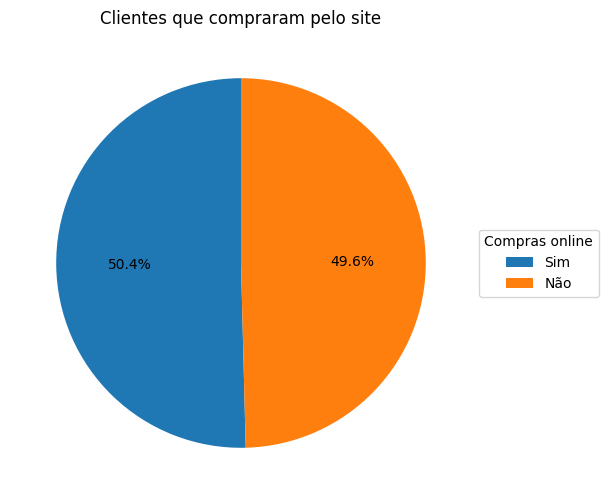

In [21]:
plt.figure(figsize=(10,6))

counts = df['WebPurchases'].value_counts()
labels = ['Sim' if val == 1 else 'Não' for val in counts.index]
wedges, texts, autotexts = plt.pie(counts, autopct='%1.1f%%', startangle=90)

plt.legend(wedges, labels, title='Compras online', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Clientes que compraram pelo site')
plt.show()

A distribuição entre clientes que fizeram compras online e os que não fizeram está bem próximo dos 50/50 conforme o gráfico de pizza acima, então não tem necessidade de balancear essa variável que é o foco do modelo.

# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








##Codificação

para entrarem no modelo, as variáveis não numéricas foram codificadas conforme código abaixo:

In [23]:
encoder = LabelEncoder()
df_refac['Marital_Status'] = encoder.fit_transform(df_refac['Marital_Status'])

df_encod_refac = pd.get_dummies(df_refac, columns=['Education'], prefix='Education')
df_encod_refac.head()

,Year_Birth,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,1957,1,58138.0,0,58,635,88,546,172,88,88,4,7,0,1,False,False,True,False,False
1,1954,1,46344.0,1,38,11,1,6,2,1,6,2,5,0,0,False,False,True,False,False
2,1965,0,71613.0,0,26,426,49,127,111,21,42,10,4,0,1,False,False,True,False,False
3,1984,0,26646.0,1,26,11,4,20,10,3,5,4,6,0,0,False,False,True,False,False
4,1981,0,58293.0,1,94,173,43,118,46,27,15,6,5,0,1,False,False,False,False,True


Em seguida, foi feito uma matriz de correlação para identificar variáveis fortes e fracas.

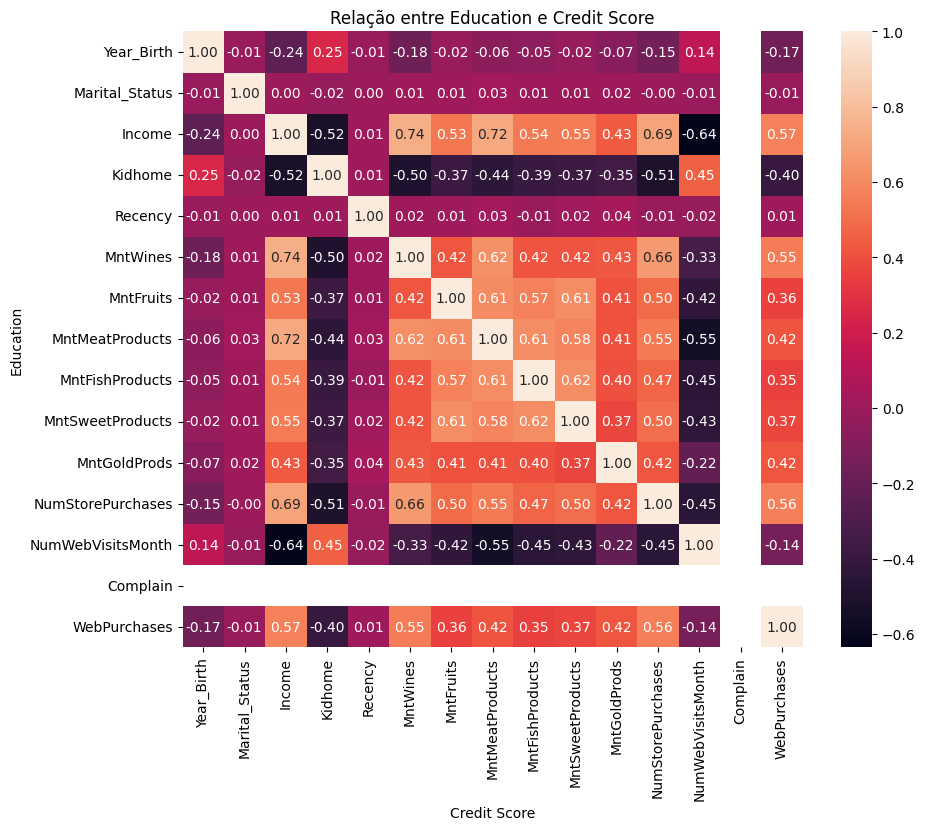

In [24]:
df_numerico_refac = df_refac.select_dtypes(include=['number'])
corr_matrix = df_numerico_refac.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Relação entre Education e Credit Score")
plt.ylabel("Education")
plt.xlabel("Credit Score")
plt.show()

Como a idéia é utilizar a técnica de PCA, nesse momento não foram selecionadas as variávies fortes para treino e teste que apareceram na matriz de correlação.

##Separação X e Y

In [25]:
X = df_encod_refac.drop(['WebPurchases'], axis=1).copy()
Y = df_encod_refac['WebPurchases'].copy()

##Padronização

Por utilizar a técnica de PCA e o modelo de regressão logística, torna-se necessário a padronização dos dados.

In [26]:
scaler_std = StandardScaler()
X_scaled = scaler_std.fit_transform(X)

# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

###PCA

In [27]:
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_scaled)

In [28]:
# Variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Variância explicada acumulada
cumulative_variance = explained_variance.cumsum()

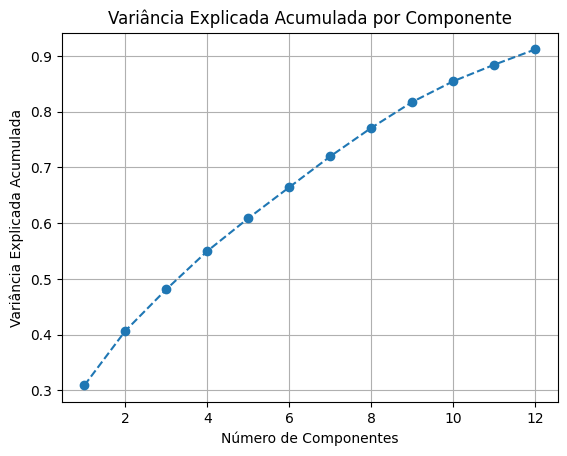

In [29]:
plt.plot(range(1, 13), cumulative_variance, marker='o', linestyle='--')
plt.title('Variância Explicada Acumulada por Componente')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show()

No gráfico acima vemos quantas váriaveis são necessárias para explicar a variância do modelo. Por consenso, recomenda-se utilizar o minimo de variáveis possíveis que consigam explicar uma variância superior a 90%. Assim, chegamos ao valor de 12 varíaveis que foi o valor selecionado para o PCA. Lembrando que a quantidade de variáveis no data frame após a codificação foi para 19, com a técnica do PCA foi possível eliminar 7 delas.

###Cross validation

A outras técnica utilizada foi a de cross validation. Dessa forma, os dados de treino e teste foram separados em 5 folds que foram aplicados posteriormente para aumentar a acurácia do modelo.

In [30]:
folds = 5
crossvalidation = KFold(n_splits=folds, shuffle=True, random_state=42)

#Modelos

##Regressão logística

In [31]:
logistic_web = LogisticRegression(random_state=42)
logistic_final = cross_val_score(logistic_web, X_pca, Y, cv=folds)

##Random Forest

In [33]:
web_rf = RandomForestClassifier(random_state=42)
rf_final = cross_val_score(web_rf, X_pca, Y, cv=folds)

# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.

In [32]:
pontuacoes_logistic = cross_val_score(logistic_web, X_pca, Y, cv=crossvalidation)
print(f'Pontuações da regressão logística: {pontuacoes_logistic}')
print(f'Média regressão logistica (acurária): {logistic_final.mean()}')

Pontuações da regressão logística: [0.83415842 0.84405941 0.8539604  0.8337469  0.87096774]
Média regressão logistica (acurária): 0.8453922315308453


In [41]:
pontuacoes_rf = cross_val_score(web_rf, X_pca, Y, cv=crossvalidation)
print(f'Pontuações da Random Forest: {pontuacoes_rf}')
print(f'Média Random Forest (acurária): {rf_final.mean()}')

[[893 146]
 [ 66 913]]
Pontuações da Random Forest: [0.87376238 0.91089109 0.88366337 0.89081886 0.91563275]
Média Random Forest (acurária): 0.8919821634768936


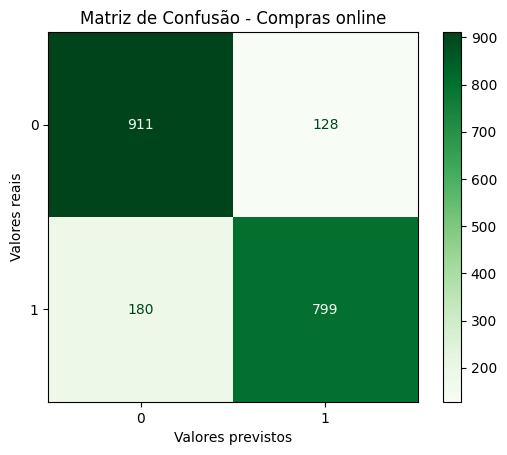

In [53]:
y_pred_logis = cross_val_predict(logistic_web, X_pca, Y, cv=crossvalidation)
cm_logis = confusion_matrix(Y, y_pred_logis)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_logis, display_labels=[0, 1])
disp.plot(cmap="Greens")
plt.title("Matriz de Confusão - Compras online")
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.show()

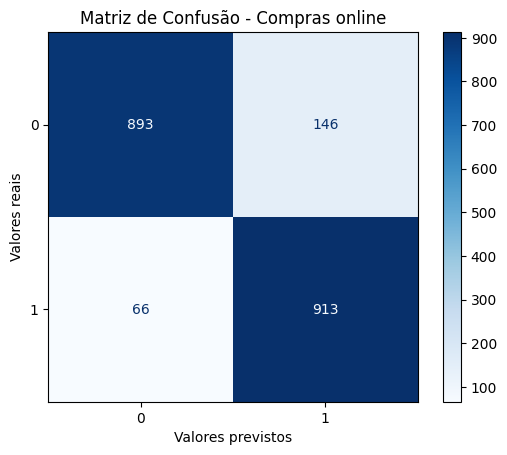

In [49]:
y_pred_rf = cross_val_predict(web_rf, X_pca, Y, cv=crossvalidation)
cm_rf = confusion_matrix(Y, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão - Compras online")
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.show()

Pelos resultados de acurácia acima, o modelo de Random Forest apresenta um valor maior (89%) que o de regressão logística (84%). Já na matriz de confusão, o modelo de Random Forest demonstra um precisão maior em acertar clientes que não fizeram as compras no site do que os clientes que fizeram as compras, ao comparas com a regressão logística.

Em resumo, ambos modelos apresentam acurácia boa, com maior destaque para o de Random Forest mas, a depender do foco da empresa, a regressão logística pode ser melhor. Caso a empresa deseja um modelo que encontre clientes que não fizeram compras online para iniciar uma campanha que busque aumentar essa clientela, o modelo de regressão é melhor. Já, se a compania deseja identificar os clientes que compram online para aumentar seus gastos nessa plataforma, o melhor modelo seria o de random Forest.